<b>Portfolio Variance</b>

In [1]:
import pandas as pd
import pandas_datareader.data as pdr    #Import Libraries
import datetime as dt
import numpy as np

In [2]:
ticker = ['CONCOR.NS','NESTLEIND.NS','ASIANPAINT.NS','HDFCBANK.NS','INFY.NS']   #Stocks of your portfolio
Wt_Stocks = [0.23,0.21,0.17,0.19,0.20]   #Weight per stock

In [3]:
start_date = dt.datetime.today() - dt.timedelta(735)        # Specify the start and end date
end_date = dt.datetime.today()

In [4]:
data = pdr.get_data_yahoo(ticker,start_date,end_date)      #Get data from Yahoo Finance API

In [5]:
df_close = data['Adj Close']     #Extract adjusted close data from whole price data
df_close

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Date,,,,,
2018-04-04,484.649475,8028.313477,1115.343994,921.878540,518.608093
2018-04-05,482.760986,8060.229004,1122.118652,934.434631,529.379822
2018-04-06,492.300934,8024.371582,1122.707764,941.532532,519.899902
2018-04-09,491.385864,8058.307617,1136.403931,949.193542,512.634216
2018-04-10,497.129333,8170.641602,1135.716919,940.284302,513.626038
...,...,...,...,...,...
2020-03-30,304.250000,15658.700195,1594.949951,831.650024,626.700012
2020-03-31,331.649994,16300.599609,1666.500000,861.900024,641.500000
2020-04-01,317.500000,15654.500000,1603.199951,829.650024,602.799988


In [6]:
df_ret = df_close.pct_change(1)     #Find the daily return
df_ret = df_ret.round(4)             #Round to 4 decimal places
df_ret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Date,,,,,
2018-04-04,NaN,NaN,NaN,NaN,NaN
2018-04-05,-0.0039,0.0040,0.0061,0.0136,0.0208
2018-04-06,0.0198,-0.0044,0.0005,0.0076,-0.0179
2018-04-09,-0.0019,0.0042,0.0122,0.0081,-0.0140
2018-04-10,0.0117,0.0139,-0.0006,-0.0094,0.0019
...,...,...,...,...,...
2020-03-30,-0.0160,0.0364,-0.0057,-0.0805,-0.0398
2020-03-31,0.0901,0.0410,0.0449,0.0364,0.0236
2020-04-01,-0.0427,-0.0396,-0.0380,-0.0374,-0.0603


In [7]:
avg_ret = df_ret.iloc[1:df_ret.size].mean()      # Find the average return over the period
avg_ret = avg_ret.round(4)   #Round to 4 decimal places
avg_ret

Symbols
CONCOR.NS       -0.0005
NESTLEIND.NS     0.0017
ASIANPAINT.NS    0.0009
HDFCBANK.NS      0.0001
INFY.NS          0.0006
dtype: float64

In [8]:
X = df_ret - avg_ret
X = X.iloc[1:X.size]   #Excess Return Matrix (Excluding NaN value at the top)
X

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Date,,,,,
2018-04-05,-0.0034,0.0023,0.0052,0.0135,0.0202
2018-04-06,0.0203,-0.0061,-0.0004,0.0075,-0.0185
2018-04-09,-0.0014,0.0025,0.0113,0.0080,-0.0146
2018-04-10,0.0122,0.0122,-0.0015,-0.0095,0.0013
2018-04-11,0.0021,-0.0044,-0.0017,-0.0011,0.0091
...,...,...,...,...,...
2020-03-30,-0.0155,0.0347,-0.0066,-0.0806,-0.0404
2020-03-31,0.0906,0.0393,0.0440,0.0363,0.0230
2020-04-01,-0.0422,-0.0413,-0.0389,-0.0375,-0.0609


In [9]:
X_n = X.reset_index()       #To remove date as datetime index
X_n.drop(columns = 'Date',inplace = True)
X_n

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,-0.0034,0.0023,0.0052,0.0135,0.0202
1,0.0203,-0.0061,-0.0004,0.0075,-0.0185
2,-0.0014,0.0025,0.0113,0.0080,-0.0146
3,0.0122,0.0122,-0.0015,-0.0095,0.0013
4,0.0021,-0.0044,-0.0017,-0.0011,0.0091
...,...,...,...,...,...
486,-0.0155,0.0347,-0.0066,-0.0806,-0.0404
487,0.0906,0.0393,0.0440,0.0363,0.0230
488,-0.0422,-0.0413,-0.0389,-0.0375,-0.0609
489,-0.0404,-0.0368,-0.0522,-0.0191,-0.0290


In [10]:
X_nT = X_n.loc[0:X_n.size,ticker[0]:ticker[-1]].T       # Transpose of matrix X

In [11]:
XTX = X_nT.dot(X_n)       #Transpose(X) * (X)

In [12]:
n = len(X_n.axes[0])   #Find the number of data points

In [13]:
var_cov_mtx = XTX/n                     #Find the variance covariance matrix
var_cov_mtx = var_cov_mtx.round(5)
var_cov_mtx

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Symbols,,,,,
CONCOR.NS,0.00052,0.00015,0.00016,0.00019,0.00012
NESTLEIND.NS,0.00015,0.00033,0.00017,0.00013,0.00012
ASIANPAINT.NS,0.00016,0.00017,0.00031,0.00015,0.00010
HDFCBANK.NS,0.00019,0.00013,0.00015,0.00029,0.00012
INFY.NS,0.00012,0.00012,0.00010,0.00012,0.00041


In [14]:
S_Dev = df_ret.std()             #Find the standard deviation of each stock
S_D = pd.DataFrame(S_Dev)
S_D = S_D.round(5)
S_D

,0
Symbols,
CONCOR.NS,0.02291
NESTLEIND.NS,0.01828
ASIANPAINT.NS,0.01758
HDFCBANK.NS,0.01704
INFY.NS,0.02028


In [15]:
S_DT = S_D.T   #Find the transpose of S.D
S_DT

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,0.02291,0.01828,0.01758,0.01704,0.02028


In [16]:
Pro_SD = S_D.dot(S_DT)      #Dins SD * SDT
Pro_SD = Pro_SD.round(5)
Pro_SD

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Symbols,,,,,
CONCOR.NS,0.00052,0.00042,0.00040,0.00039,0.00046
NESTLEIND.NS,0.00042,0.00033,0.00032,0.00031,0.00037
ASIANPAINT.NS,0.00040,0.00032,0.00031,0.00030,0.00036
HDFCBANK.NS,0.00039,0.00031,0.00030,0.00029,0.00035
INFY.NS,0.00046,0.00037,0.00036,0.00035,0.00041


In [17]:
corr_mtx = var_cov_mtx.div(Pro_SD)    # var_cov_mtx * Pro_SD
corr_mtx = corr_mtx.round(5)         #Correlation matrix
corr_mtx

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
Symbols,,,,,
CONCOR.NS,1.00000,0.35714,0.40000,0.48718,0.26087
NESTLEIND.NS,0.35714,1.00000,0.53125,0.41935,0.32432
ASIANPAINT.NS,0.40000,0.53125,1.00000,0.50000,0.27778
HDFCBANK.NS,0.48718,0.41935,0.50000,1.00000,0.34286
INFY.NS,0.26087,0.32432,0.27778,0.34286,1.00000


In [18]:
Wt_Stocks_df = pd.DataFrame(Wt_Stocks)           #Convert the weight of each stock into a dataframe
Wt_Stocks_df = Wt_Stocks_df.set_index(S_D.index)   #Set the index same as all others
Wt_Stocks_df

,0
Symbols,
CONCOR.NS,0.23
NESTLEIND.NS,0.21
ASIANPAINT.NS,0.17
HDFCBANK.NS,0.19
INFY.NS,0.20


In [19]:
Wt_SD = S_Dev * Wt_Stocks        # Find the weighted standard deviation of stocks
Wt_SD_df = pd.DataFrame(Wt_SD)
Wt_SD_df = Wt_SD_df.round(5)
Wt_SD_df

,0
Symbols,
CONCOR.NS,0.00527
NESTLEIND.NS,0.00384
ASIANPAINT.NS,0.00299
HDFCBANK.NS,0.00324
INFY.NS,0.00406


In [20]:
M1 = Wt_SD_df.T.dot(corr_mtx)     # Transpose(Wt_SD) * Corr_mtx
M1

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,0.010475,0.009986,0.009886,0.010305,0.008622


In [21]:
M2 = M1.dot(Wt_SD_df)    #M1 * Wt_SD
M2

,0
0,0.000191


In [22]:
Port_Var = M2[0].apply('sqrt')    #Sqrt(M2) = Portfolio Variance or Portfolio S.D
Port_Var = Port_Var*100
Port_Var = Port_Var.round(3)
Port_Var

0    1.384
Name: 0, dtype: float64

In [23]:
Annual_Port_SD = Port_Var*(252**(1/2))
Annual_Port_SD

0    21.970319
Name: 0, dtype: float64

In [24]:
Wt_port_ret = Wt_Stocks_df.T.mul(100)    # Convert stock weights into percentages
Wt_port_ret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,23.0,21.0,17.0,19.0,20.0


In [25]:
port_dret = pd.concat([Wt_port_ret,df_ret[1:]], ignore_index = True)    #Concatenate previous dataframe to weighted stocks dataframe
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,23.0000,21.0000,17.0000,19.0000,20.0000
1,-0.0039,0.0040,0.0061,0.0136,0.0208
2,0.0198,-0.0044,0.0005,0.0076,-0.0179
3,-0.0019,0.0042,0.0122,0.0081,-0.0140
4,0.0117,0.0139,-0.0006,-0.0094,0.0019
...,...,...,...,...,...
487,-0.0160,0.0364,-0.0057,-0.0805,-0.0398
488,0.0901,0.0410,0.0449,0.0364,0.0236
489,-0.0427,-0.0396,-0.0380,-0.0374,-0.0603
490,-0.0409,-0.0351,-0.0513,-0.0190,-0.0284


In [26]:
for i in range(1,len(port_dret.index)):
    port_dret.iloc[i] = port_dret.iloc[i-1]*(1+port_dret.iloc[i])     #Portfolio's daily returns

In [27]:
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS
0,23.000000,21.000000,17.000000,19.000000,20.000000
1,22.910300,21.084000,17.103700,19.258400,20.416000
2,23.363924,20.991230,17.112252,19.404764,20.050554
3,23.319532,21.079394,17.321021,19.561942,19.769846
4,23.592371,21.372397,17.310629,19.378060,19.807409
...,...,...,...,...,...
487,14.444584,40.938182,24.339958,17.158732,24.156754
488,15.746041,42.616647,25.432822,17.783310,24.726853
489,15.073685,40.929028,24.466375,17.118214,23.235824
490,14.457171,39.492419,23.211250,16.792968,22.575927


In [28]:
port_dret['NAV'] = port_dret.sum(axis = 1)     #Returns in terms of NAV
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS,NAV
0,23.000000,21.000000,17.000000,19.000000,20.000000,100.000000
1,22.910300,21.084000,17.103700,19.258400,20.416000,100.772400
2,23.363924,20.991230,17.112252,19.404764,20.050554,100.922724
3,23.319532,21.079394,17.321021,19.561942,19.769846,101.051736
4,23.592371,21.372397,17.310629,19.378060,19.807409,101.460866
...,...,...,...,...,...,...
487,14.444584,40.938182,24.339958,17.158732,24.156754,121.038209
488,15.746041,42.616647,25.432822,17.783310,24.726853,126.305673
489,15.073685,40.929028,24.466375,17.118214,23.235824,120.823126
490,14.457171,39.492419,23.211250,16.792968,22.575927,116.529735


In [29]:
port_dret = port_dret.set_index(df_ret.index)    #Set the date index
port_dret

Symbols,CONCOR.NS,NESTLEIND.NS,ASIANPAINT.NS,HDFCBANK.NS,INFY.NS,NAV
Date,,,,,,
2018-04-04,23.000000,21.000000,17.000000,19.000000,20.000000,100.000000
2018-04-05,22.910300,21.084000,17.103700,19.258400,20.416000,100.772400
2018-04-06,23.363924,20.991230,17.112252,19.404764,20.050554,100.922724
2018-04-09,23.319532,21.079394,17.321021,19.561942,19.769846,101.051736
2018-04-10,23.592371,21.372397,17.310629,19.378060,19.807409,101.460866
...,...,...,...,...,...,...
2020-03-30,14.444584,40.938182,24.339958,17.158732,24.156754,121.038209
2020-03-31,15.746041,42.616647,25.432822,17.783310,24.726853,126.305673
2020-04-01,15.073685,40.929028,24.466375,17.118214,23.235824,120.823126


In [30]:
per_stock_ret_year =  avg_ret.mul(252)          #Per stock annual return
per_stock_ret_year = pd.DataFrame(per_stock_ret_year)
per_stock_ret_year

,0
Symbols,
CONCOR.NS,-0.1260
NESTLEIND.NS,0.4284
ASIANPAINT.NS,0.2268
HDFCBANK.NS,0.0252
INFY.NS,0.1512


<b> Output Results </b>

In [31]:
Expected_portfolio_pct_ret = (Wt_Stocks_df.mul(per_stock_ret_year).sum()*100).round(2)   #Expected portfolio return in percent
Expected_portfolio_pct_ret

0    13.46
dtype: float64

In [32]:
Annual_Port_SD      #Annual Portfolio Standard deviation

0    21.970319
Name: 0, dtype: float64

In [33]:
NAV_today = (port_dret.loc[dt.date.today(),'NAV']).round(3)   #NAV as of today
NAV_today

128.081

In [34]:
%matplotlib inline   

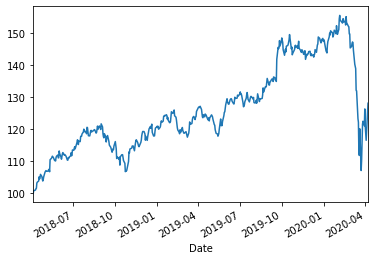

In [35]:
NAV = port_dret['NAV']        #Plot NAV(Net asset value of portfolio)
NAV.plot()    